<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_1_2_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 1.2**
# **Elements of Linear Algebra**

Concepts covered:


*   1.2.1. Linear spaces
*   1.2.2. Orthogonality
*   1.2.3. Gram–Schmidt process
*   1.2.4. Eigenvalues and eigenvectors





# 1.2.1: Linear Spaces
To demonstrate concept of linear spaces, will present an example that shows linear independence and how linear independence is needed to span a subspace. The first code block randomly generates a vector in R2 and the linearly independent vectors v1 and v2 can be linearly combined to get the desired vector.

In [ ]:
#need these libraries to work with matrices and create figures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#provide two vectors that are not scalar multiples of each other, otherwise known as linearly independent
v1 = np.array([1,2])
v2 = np.array([3,5])

#now generate a random vector and use linear combinations of v1 and v2 to find it
v3 = np.random.randint(-20, 21, size = 2)

# In order to solve for the appropriate coefficients of v1 and v2, need to
# stack v1 and v2 as columns to form the matrix A
A = np.column_stack((v1, v2))

# Solve the equation Ax = v3 using linalg
# can also think of this as xv1 + yv2 = v3
# this shows that the two vectors v1 and v2 span R2
x, y = np.linalg.solve(A, v3)

print(f"v1: {v1}")
print(f"v2: {v2}")
print("Matrix A:")
print(A)
print(f"v3: {v3}")
print(f"Solution: x = {x}, y = {y}")

v1: [1 2]
v2: [3 5]
Matrix A:
[[1 3]
 [2 5]]
v3: [-1 16]
Solution: x = 53.0, y = -18.0


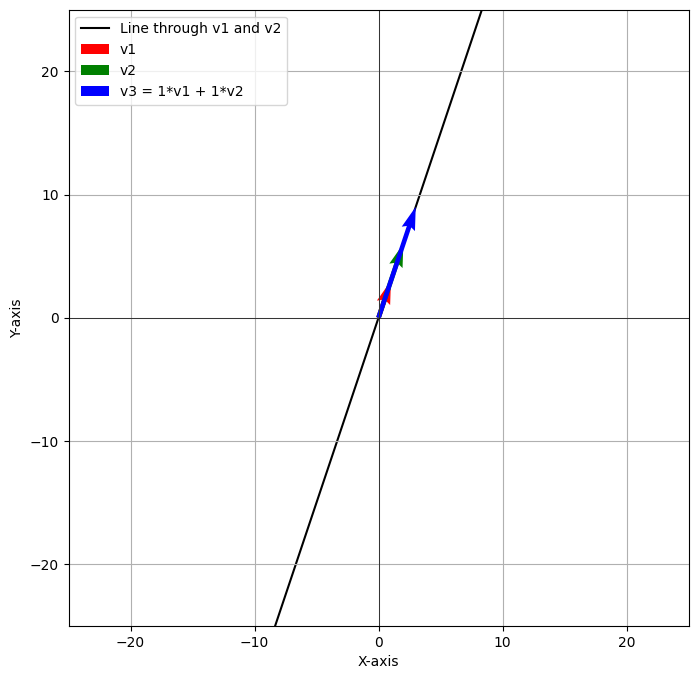

[3 9]


In [ ]:
#now to show linear dependence, pick two linearly dependent vectors. v2 = 2* v1
v1 = np.array([1,3])
v2 = np.array([2,6])

#will pick two random coefficients
x = np.random.randint(-5, 6, size = 1)
y = np.random.randint(-5, 6, size = 1)

# Compute the linear combination x*v1 + y*v2
v3 = x * v1 + y * v2

# Create a 25x25 plot
plt.figure(figsize=(8, 8))
plt.xlim(-25, 25)
plt.ylim(-25, 25)

# Plot the line defined by v1 and v2
line_x = np.linspace(-25, 25, 100)
line_y = 3 * line_x  # Since v2 = 2*v1, the slope is the same as v1

plt.plot(line_x, line_y, 'k-', label='Line through v1 and v2', zorder=1)

# Plot the vectors v1, v2, and v3
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2')
plt.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='b', label=f'v3 = {x[0]}*v1 + {y[0]}*v2')

# Add grid, labels, and legend
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()
print(v3)

# 1.2.2: Orthogonality
To demonstrate concept of orthogonality, will present an example that shows dot product of orthogonal vectors is 0, Lemma 1.2.12 (Pythagorean theorem), linear independence and how linear independence is needed to span a subspace.

Vector u: [1 0]
Vector v: [0 1]
Dot product u·v: 0
LHS - Sum vector ||u+v||^2: 2.0
RHS - ||u||^2 + ||v||^2: 2.0
Angle between u and v: 90.0 degrees


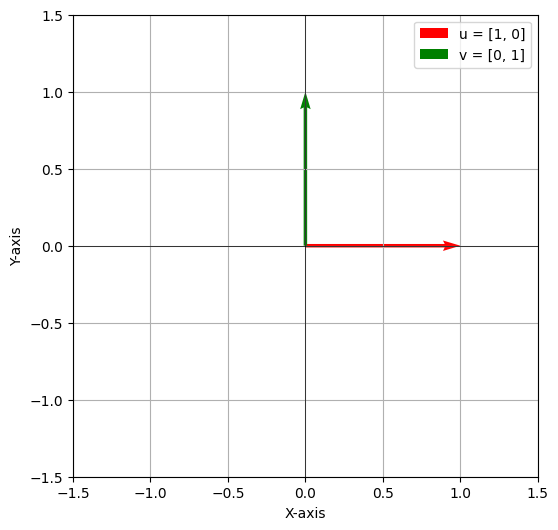

In [ ]:
# simply use standard basis vectors as they are orthogonal and span R2
u = np.array([1, 0])  # Along the x-axis
v = np.array([0, 1])  # Along the y-axis

# to demonstrate they are orthogonal, will calculate
# their dot product-which should be 0 for orthogonal vectors
dot_product = np.dot(u, v)

print(f"Vector u: {u}")
print(f"Vector v: {v}")
print(f"Dot product u·v: {dot_product}")  # Should print 0

#will now demonstrate that given orthogonal vectors u,v , then
# ||u + v||^2 = ||u||^2 + ||v||^2.

sum_vector = u+v


# Calculate the norms of the vectors

norm_sum = np.linalg.norm(sum_vector)

sum_squared = norm_sum**2

# for u and v, this value will just be 1 since they are standard basis and have length 1
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)

uNorm_squared = norm_u**2
vNorm_squared = norm_v**2

RHS_sum = uNorm_squared+vNorm_squared

print(f"LHS - Sum vector ||u+v||^2: {sum_squared:.1f}")
print(f"RHS - ||u||^2 + ||v||^2: {RHS_sum:.1f}")


# Calculate the angle between them (should be 90 degrees for orthogonal vectors)
cos_theta = dot_product / (norm_u * norm_v)
theta = np.arccos(cos_theta)  # in radians
theta_degrees = np.degrees(theta)  # convert to degrees

# Display the result
print(f"Angle between u and v: {theta_degrees} degrees")

# Plotting the vectors in R^2
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u = [1, 0]')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v = [0, 1]')

# Add grid, labels, and legend
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()


Original vector v: [3 2]
Subspace vector u1: [1 1]
Normalized u1: [0.70710678 0.70710678]
Orthogonal projection of v onto u1: [2.5 2.5]
Vector component orthogonal to u1: [ 0.5 -0.5]


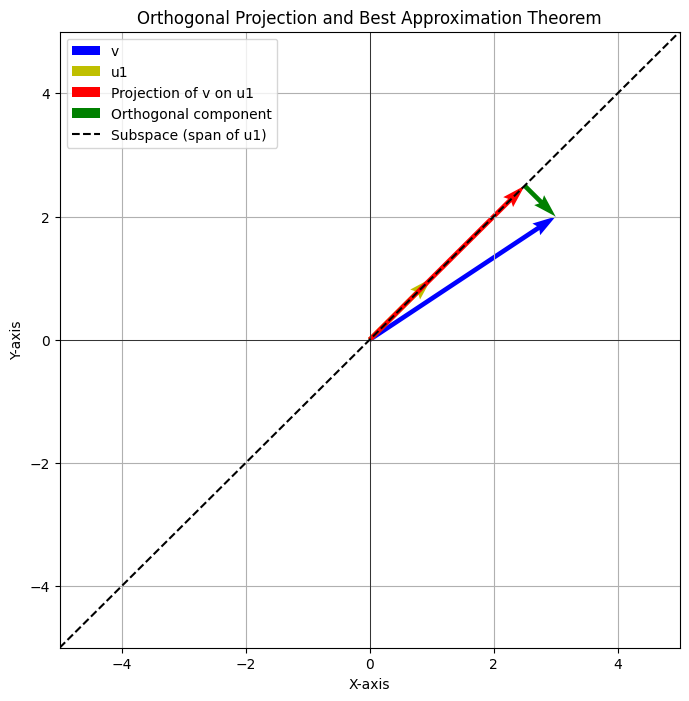

In [ ]:
# u1 will be the the subspace vector. pick a vector, v, not in its subspace.
# will use best approx thm to project v onto u and minimize distance
u1 = np.array([1, 1])  # Basis vector for the subspace
v = np.array([3, 2])   # Vector not in the subspace

# Normalize u1 to use it in the projection calculation
u1_normalized = u1 / np.linalg.norm(u1)

# Compute the orthogonal projection of v onto u1
# sinc u1 is normalized, will divide by 1, so omitted it in the code
projection_v_on_u1 = np.dot(v, u1_normalized) * u1_normalized

# Compute the vector component orthogonal to u1
v_minus_projection = v - projection_v_on_u1

# Print results
print(f"Original vector v: {v}")
print(f"Subspace vector u1: {u1}")
print(f"Normalized u1: {u1_normalized}")
print(f"Orthogonal projection of v onto u1: {projection_v_on_u1}")
print(f"Vector component orthogonal to u1: {v_minus_projection}")

# Visualization
plt.figure(figsize=(8, 8))
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Plot the vectors
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v')
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='y', label='u1')
plt.quiver(0, 0, projection_v_on_u1[0], projection_v_on_u1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Projection of v on u1')
plt.quiver(projection_v_on_u1[0], projection_v_on_u1[1], v_minus_projection[0], v_minus_projection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Orthogonal component')

# Draw the subspace line
line_x = np.linspace(-5, 5, 100)
line_y = line_x  # Since u1 = [1,1], the line y = x represents the subspace
plt.plot(line_x, line_y, 'k--', label='Subspace (span of u1)')

# Adding labels and legend
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Orthogonal Projection and Best Approximation Theorem')
plt.show()


# 1.2.3: Gram–Schmidt process

To demonstrate concept of Gram–Schmidt process, will write code that implements the Gram–Schmidt algorithm to obtain an orthonormal basis.


In [ ]:
#will first define two functions that will be used to get the orthonormal basis

#first is the projection helper function
#computes the projection of vector u onto vector v.

def projection(u, v):
    return (np.dot(u, v) / np.dot(v, v)) * v


#next is gram-schmidt function, which applies the process to a matrix
#to obtain the orthonormal basis

def gram_schmidt(A):

    #get the dimension of A. Since its a square, number of columns and rows is same
    n = A.shape[1]
    #now initialize an empty matrix of same shape as A
    Q = np.zeros_like(A)

    #use for loop, which will iterate as many times as number of columns/rows
    for i in range(n):
        #will get first vector from matrix
        v = A[:, i]

        #use a nested for loop to subtract projections of v onto the previously computed basis vectors
        for j in range(i):
            v -= projection(v, Q[:, j])

        # last step is to normalize the vector
        Q[:, i] = v / np.linalg.norm(v)

    return Q

#will now define a 3x3 matrix with linearly independent vectors
#To avoid issues, declared each value as a float. encountered issues using int values
A = np.array([[4.0, 1.0, 5.0],
              [1.0,3.0, 8.0],
              [2.0, 5.0,9.0]])

# Compute the orthonormal basis using Gram-Schmidt process
orthonormal_basis = gram_schmidt(A)
print("Orthonormal Basis:\n", orthonormal_basis)

#to verify our work and that the basis produced is both orthogonal AND normalized
#first will check that dot product is 0

n = orthonormal_basis.shape[1]

print("\nChecking orthogonality:")
for i in range(n):
  #need to use nested loop to do all three combos of vectors
    for j in range(i+1, n):
        dot_product = np.dot(orthonormal_basis[:, i], orthonormal_basis[:, j])
        print(f"Dot product of vector {i+1} and vector {j+1}: {dot_product:.2f}")

# Check normalization
print("\nChecking normalization:")
for i in range(n):
    norm = np.linalg.norm(orthonormal_basis[:, i])
    print(f"Norm of vector {i+1}: {norm:.2f}")


Orthonormal Basis:
 [[ 0.87287156 -0.48564708  0.04735137]
 [ 0.21821789  0.47531416  0.8523247 ]
 [ 0.43643578  0.73363708 -0.5208651 ]]

Checking orthogonality:
Dot product of vector 1 and vector 2: 0.00
Dot product of vector 1 and vector 3: 0.00
Dot product of vector 2 and vector 3: -0.00

Checking normalization:
Norm of vector 1: 1.00
Norm of vector 2: 1.00
Norm of vector 3: 1.00


# 1.2.4: Eigenvalues and Eigenvectors

To demonstrate concept of Eigenvalues and eigenvectors, will present an example that shows a sqaure matrix A multiplied by an eigenvectors has the same effect as scaling the eigenvector by a non-zero value (the eigenvector).



Eigenvalues:  [4.61803399 2.38196601]
Eigenvectors: 
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
LHS - A*x1 : [3.92833435 2.42784414]
RHS - lambda1*x1 : [3.92833435 2.42784414]


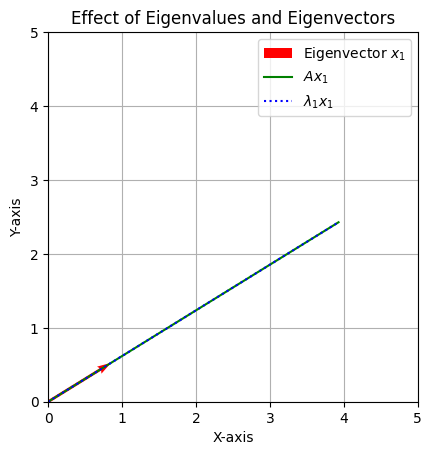

In [ ]:
#begin demonstration with a symmetric matrix, since they are easier to work with
# and eigenvalues of a symmetric matrix are all real numbers
A = np.array([[4, 1],
             [1,3]])

#will use linalg from np to compute eigenvalues and eigenvectors

eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues: ", eigvals)
print("Eigenvectors: \n", eigvecs)

#now want to show that A*x = lambda*x. will use first eigenvector and eigenvalue

x1 = eigvecs[:,0]
lambda1 = eigvals[0]

LHS = A @ x1
RHS =  lambda1 * x1

print(f"LHS - A*x1 : {LHS}")
print(f"RHS - lambda1*x1 : {RHS}")

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the original eigenvector
ax.quiver(0, 0, x1[0], x1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Eigenvector $x_1$')

# *****opting to not use quivers for the following two vectors as I couldn't adjust their linestyle***
# Plot the LHS resulting vector from A*x1
ax.plot([0, LHS[0]], [0, LHS[1]], color='g', label='$A x_1$')

# Plot the RHS resulting vector from lambda1*x1
ax.plot([0, RHS[0]], [0, RHS[1]], color='b', linestyle=':', label='$\lambda_1 x_1$')

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add the grid, legend, and labels
ax.grid()
ax.set_aspect('equal')
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Effect of Eigenvalues and Eigenvectors')

# Show the plot
plt.show()
